# ns-3 test results
This notebook takes results from the ns3 tests and plots them.

CAREFUL! cwnd does not translate to throughput, even for a program sending at the full capacity of the cwnd. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import re

[]

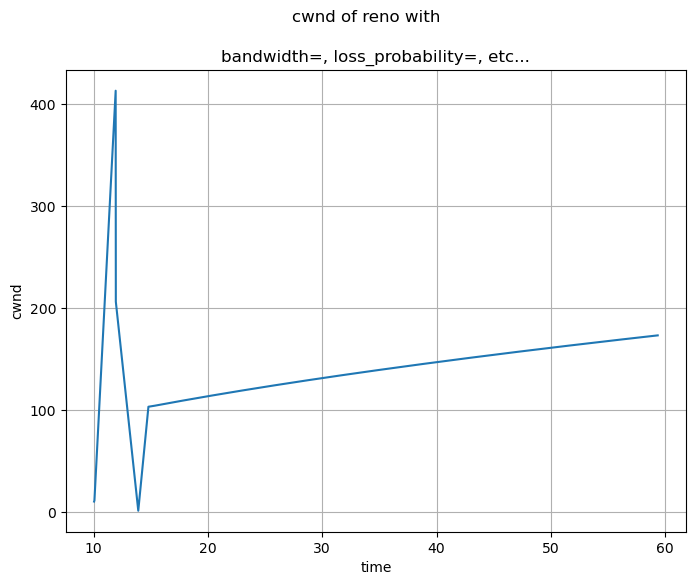

In [12]:
#configure before plotting
filename = "reno0.dat"
save_figure = True


# read file and convert to numpy
data = np.loadtxt(f'./ns3_results/{filename}')
# plot data
fig, axs = plt.subplots(1, 1, figsize=(8,6))
axs.plot(data[:,0],data[:,1])
axs.set_xlabel("time")
axs.set_ylabel("cwnd")
axs.grid()
axs.set_title("bandwidth=, loss_probability=, etc...")
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.png")
plt.plot()

[]

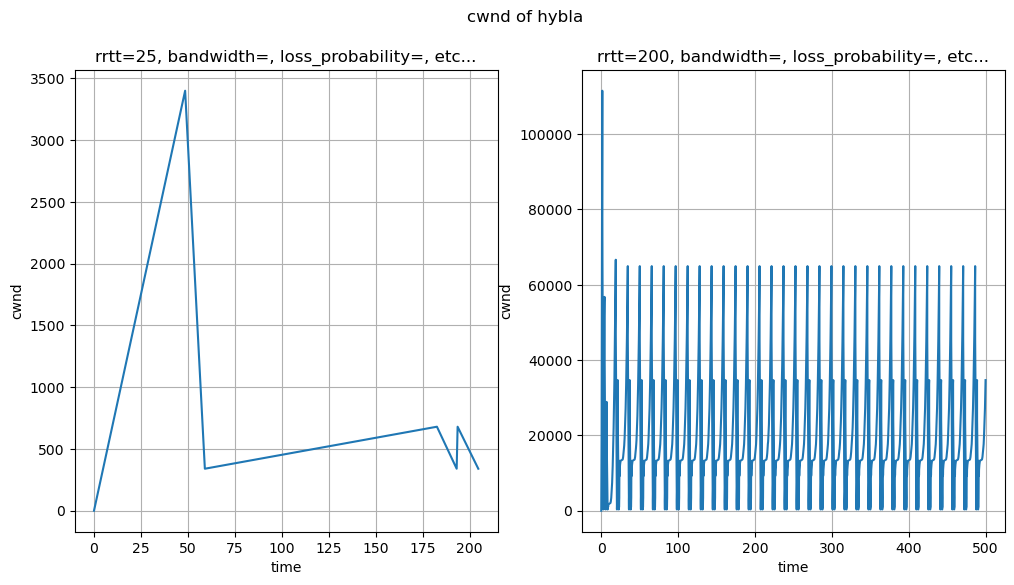

In [25]:
#configure before plotting
filename1 = "19.07.23/cubic/TcpCubic0.657553-250.000000ms-cwnd.data"
filename2 = "19.07.23/cubic/TcpCubic0.000010-50.000000ms-cwnd.data"
save_figure = False

# read file and convert to numpy
data = np.loadtxt(f'./ns3_results/{filename1}')
# plot data
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].plot(data[:,0],data[:,1])
axs[0].set_xlabel("time")
axs[0].set_ylabel("cwnd")
axs[0].grid()
axs[0].set_title("rrtt=25, bandwidth=, loss_probability=, etc...")
data = np.loadtxt(f'./ns3_results/{filename2}')
axs[1].plot(data[:,0],data[:,1])
axs[1].set_xlabel("time")
axs[1].set_ylabel("cwnd")
axs[1].grid()
axs[1].set_title("rrtt=200, bandwidth=, loss_probability=, etc...")
fig.suptitle("cwnd of hybla")
plt.plot()

[]

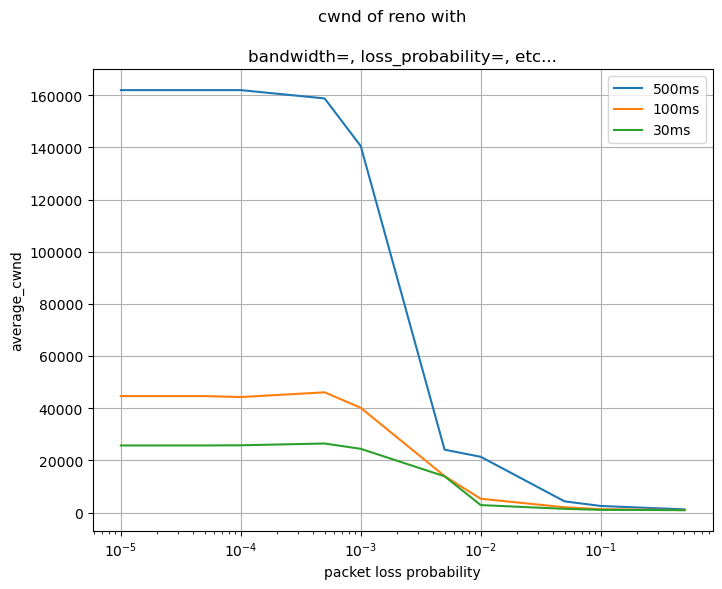

In [19]:
error_ps = ["0.500000","0.100000","0.050000","0.010000","0.005000","0.001000","0.000500","0.000100","0.000050","0.000010"]
error_ps_int = [0.500000,0.100000,0.050000,0.010000,0.005000,0.001000,0.000500,0.000100,0.000050,0.000010]
averages = np.zeros((len(error_ps),3))
# plot data
fig, axs = plt.subplots(1, 1, figsize=(8,6))
for i,e in enumerate(error_ps):
    e = e.replace('.','_')
    for j,rtt in enumerate([500,100,30]):
        filename = "TcpCubic"+e+"-"+str(rtt)+"ms-loss-cwnd.data"
        data = np.loadtxt(f'./ns3_results/{filename}')
        averages[i,j] = np.average(data[:,1])
axs.semilogx(error_ps_int,averages[:,0],label="500ms")
axs.semilogx(error_ps_int,averages[:,1],label="100ms")
axs.semilogx(error_ps_int,averages[:,2],label="30ms")
axs.set_xlabel("packet loss probability")
axs.set_ylabel("average_cwnd")
axs.grid()
axs.set_title("bandwidth=, loss_probability=, etc...")
axs.legend()
fig.suptitle("cwnd of reno with")
if save_figure:
    plt.savefig(f"./figures/ns3_results/{filename}.png")
plt.plot()

In [6]:
folder_path = "./ns3_results/cubic/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500_cubic = {}
average_100_cubic = {}
average_30_cubic = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0_(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+)_",filename).group(1)
    data = np.loadtxt(f'./ns3_results/cubic/{filename}')
    if rtt == "500":
        average_500_cubic[error] = np.average(data[:,1])/1/1024
    if rtt == "100":
        average_100_cubic[error] = np.average(data[:,1])/0.2/1024
    if rtt == "30":
        average_30_cubic[error] = np.average(data[:,1])/0.06/1024
average_500_cubic=dict(sorted(average_500_cubic.items()))
average_100_cubic=dict(sorted(average_100_cubic.items()))
average_30_cubic=dict(sorted(average_30_cubic.items()))

In [7]:
folder_path = "./ns3_results/Hybla/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500 = {}
average_100 = {}
average_30 = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0_(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)_",filename).group(1)
    data = np.loadtxt(f'./ns3_results/Hybla/{filename}')
    if rtt == "500":
        average_500[error] = np.average(data[:,1])/1/1024
    if rtt == "100":
        average_100[error] = np.average(data[:,1])/0.2/1024
    if rtt == "30":
        average_30[error] = np.average(data[:,1])/0.06/1024
average_500=dict(sorted(average_500.items()))
average_100=dict(sorted(average_100.items()))
average_30=dict(sorted(average_30.items()))

[]

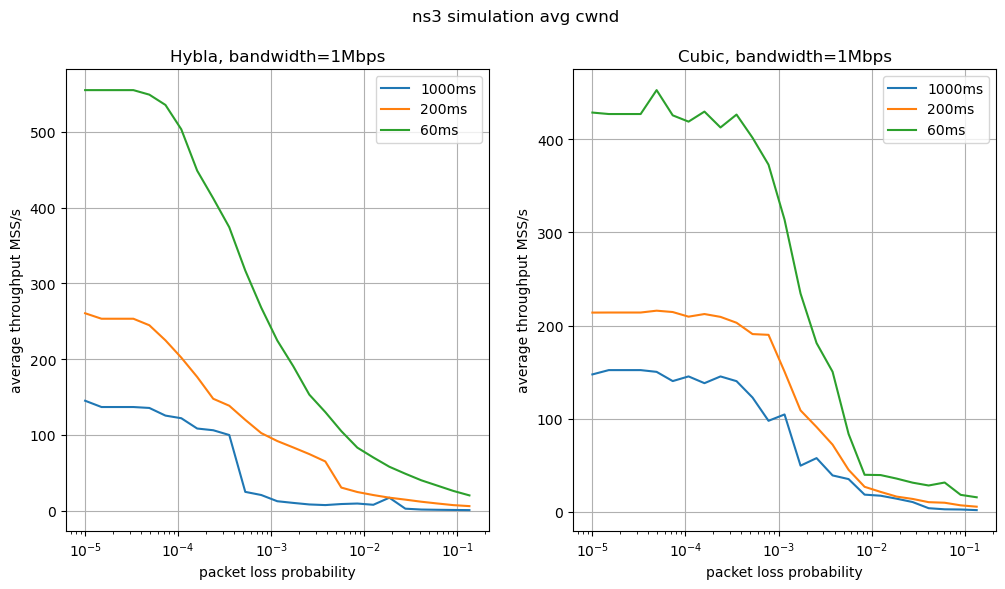

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[1].semilogx(average_500_cubic.keys(),average_500_cubic.values(),label="1000ms")
axs[1].semilogx(average_100_cubic.keys(),average_100_cubic.values(),label="200ms")
axs[1].semilogx(average_30_cubic.keys(),average_30_cubic.values(),label="60ms")
axs[1].set_xlabel("packet loss probability")
axs[1].set_ylabel("average throughput MSS/s")
axs[1].grid()
axs[1].set_title("Cubic, bandwidth=1Mbps")
axs[1].legend()
axs[0].semilogx(average_500.keys(),average_500.values(),label="1000ms")
axs[0].semilogx(average_100.keys(),average_100.values(),label="200ms")
axs[0].semilogx(average_30.keys(),average_30.values(),label="60ms")
axs[0].set_xlabel("packet loss probability")
axs[0].set_ylabel("average throughput MSS/s")
axs[0].grid()
axs[0].set_title("Hybla, bandwidth=1Mbps")
axs[0].legend()
fig.suptitle("ns3 simulation avg cwnd")
save_figure=True
if save_figure:
    plt.savefig(f"./figures/ns3_results/HyblaCubicthroughput.png")
plt.plot()

In [36]:
folder_path = "./ns3_results/19.07.23/cubic/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500_cubic = {}
average_100_cubic = {}
average_30_cubic = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0\.(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)\.",filename).group(1)
    data = np.loadtxt(folder_path+filename)
    if rtt == "250":
        average_500_cubic[error] = np.average(data[:,1])/1/1024
    if rtt == "50":
        average_100_cubic[error] = np.average(data[:,1])/0.2/1024
    if rtt == "15":
        average_30_cubic[error] = np.average(data[:,1])/0.06/1024
average_500_cubic=dict(sorted(average_500_cubic.items()))
average_100_cubic=dict(sorted(average_100_cubic.items()))
average_30_cubic=dict(sorted(average_30_cubic.items()))

In [40]:
folder_path = "./ns3_results/19.07.23/hybla/"
# Get a list of all files in the folder
file_list = os.listdir(folder_path)
average_500 = {}
average_100 = {}
average_30 = {}
# Loop through each file and save the average
for i,filename in enumerate(file_list):
    # Search for the pattern in the filename
    match = re.search(r"0\.(\d+?)-", filename)
    if not match: 
        continue
    error = float("0."+ match.group(1))
    rtt = re.search(r"-(\d+?)\.",filename).group(1)
    data = np.loadtxt(f'./ns3_results/19.07.23/hybla/{filename}')
    if rtt == "250":
        average_500[error] = np.average(data[:,1])/0.5
    if rtt == "50":
        average_100[error] = np.average(data[:,1])/0.1
    if rtt == "15":
        average_30[error] = np.average(data[:,1])/0.03
average_500=dict(sorted(average_500.items()))
average_100=dict(sorted(average_100.items()))
average_30=dict(sorted(average_30.items()))

[]

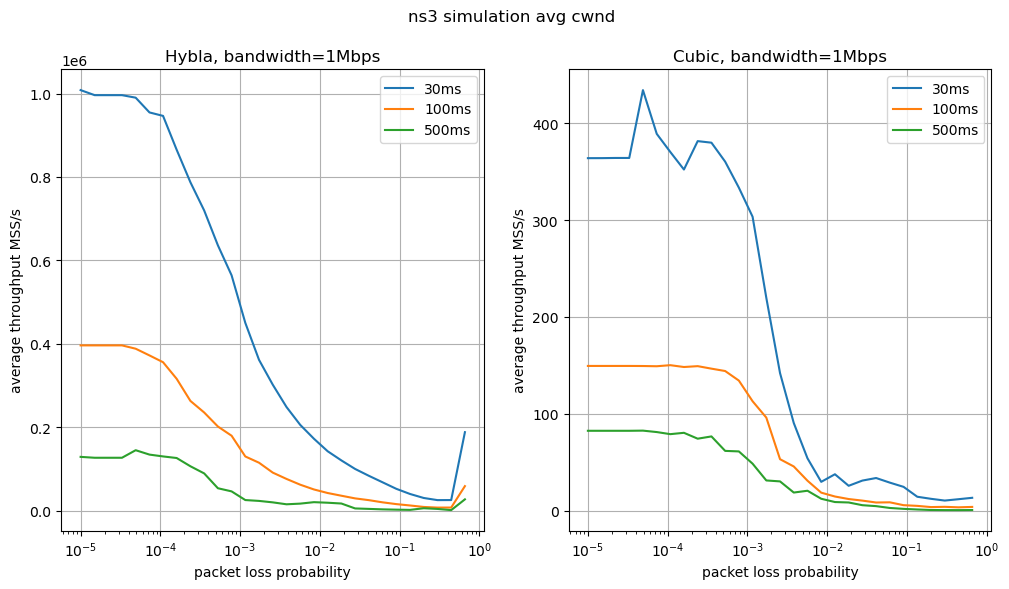

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[1].semilogx(average_30_cubic.keys(),average_30_cubic.values(),label="30ms",color="tab:blue")
axs[1].semilogx(average_100_cubic.keys(),average_100_cubic.values(),label="100ms",color="tab:orange")
axs[1].semilogx(average_500_cubic.keys(),average_500_cubic.values(),label="500ms",color="tab:green")
axs[1].set_xlabel("packet loss probability")
axs[1].set_ylabel("average throughput MSS/s")
axs[1].grid()
axs[1].set_title("Cubic, bandwidth=1Mbps")
axs[1].legend()
axs[0].semilogx(average_30.keys(),average_30.values(),label="30ms", color="tab:blue")
axs[0].semilogx(average_100.keys(),average_100.values(),label="100ms", color="tab:orange")
axs[0].semilogx(average_500.keys(),average_500.values(),label="500ms",color="tab:green")
axs[0].set_xlabel("packet loss probability")
axs[0].set_ylabel("average cwnd")
axs[0].grid()
axs[0].set_title("Hybla, bandwidth=1Mbps, rtt0=25ms")
axs[0].legend()
fig.suptitle("ns3 simulation avg cwnd")
save_figure=True
if save_figure:
    plt.savefig(f"./figures/ns3_results/HyblaCubicCwnd.png")
plt.plot()

In [31]:
average_100

{}